<a href="https://colab.research.google.com/github/macrodatascience/fmml2021/blob/main/Lab2_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [ ]:
rng

Generator(PCG64) at 0x7F7050C2D750

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


In [ ]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [ ]:
dataset.target

array([4, 3, 3, ..., 0, 0, 0])

Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

In [ ]:
rng.integers(low=0, high=100, size=100)

array([36, 90, 49, 69, 45, 26, 76, 96, 26, 77, 26, 71, 78, 44, 73, 27,  7,
        9, 44, 90, 12, 45, 70, 20, 72, 30, 80, 57, 54, 17, 46, 85,  1, 75,
       49, 71, 66, 43, 30, 62, 14, 58,  9, 64, 62,  8, 75, 41, 78,  4, 17,
       49, 18, 32, 66, 14, 67, 10, 17, 58, 79, 17, 29, 92, 98, 58, 44, 34,
       61, 59, 29,  2, 15, 95, 41, 48, 46, 78,  6,  8, 27, 48, 67, 49, 44,
       93, 16, 57, 54, 47, 80, 26, 95, 33, 54, 52, 84, 43, 28,  2])

In [ ]:
r = rng.random(100)
r<0.50

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False])

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4102
Number of other samples =  16538
Percent of test data =  19.874031007751938 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.17062914442827107


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.3396409509946628
Validation accuracy using random classifier is  0.16690926734594858


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 25/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.3162386281297802


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3395904436860068


In [ ]:
val_accuracies = []

In [ ]:
Accuracy(vallabel, valpred)

0.31052208835341366

In [ ]:
train_splits = [25,35,45,55,65,75,85,95,99,99.9]
val_splits = [75,65,55,45,35,25,15,5,1,0.1]

In [ ]:
for i in train_splits:
  print(i)

25
35
45
55
65
75
85
95
99
99.9


In [ ]:
for i in train_splits:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of nearest neighbour is ", valAccuracy)

  valpred_RC = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy_RC = Accuracy(vallabel, valpred_RC)
  print("Validation accuracy using random classifier is ", valAccuracy_RC)

  testpred = NN(alltraindata, alltrainlabel, testdata)
  testAccuracy = Accuracy(testlabel, testpred)
  print('Test accuracy is ', testAccuracy)

  testpred_usingval = NN(valdata, vallabel, testdata)
  testAccuracy_usingval = Accuracy(testlabel, testpred_usingval)
  print('Test accuracy using validation set is ', testAccuracy_usingval)
  val_accuracies.append([valAccuracy, valAccuracy_RC, testAccuracy, testAccuracy_usingval])

Validation accuracy of nearest neighbour is  0.31610770719122866
Validation accuracy using random classifier is  0.1606739761367301
Test accuracy is  0.3395904436860068
Test accuracy using validation set is  0.3356899073622623
Validation accuracy of nearest neighbour is  0.31940437412750117
Validation accuracy using random classifier is  0.15877152163797115
Test accuracy is  0.3395904436860068
Test accuracy using validation set is  0.3369088249634325
Validation accuracy of nearest neighbour is  0.3342477778997037
Validation accuracy using random classifier is  0.16613628881817183
Test accuracy is  0.3395904436860068
Test accuracy using validation set is  0.33764017552413456
Validation accuracy of nearest neighbour is  0.3321593064210241
Validation accuracy using random classifier is  0.17231102682199945
Test accuracy is  0.3395904436860068
Test accuracy using validation set is  0.3303266699171136
Validation accuracy of nearest neighbour is  0.33367983367983367
Validation accuracy using

In [ ]:
VA_NN = [nn[0] for nn in val_accuracies]
VA_RC = [nn[1] for nn in val_accuracies]
TA = [nn[2] for nn in val_accuracies]
TA_usingval = [nn[3] for nn in val_accuracies]

In [ ]:
val_accuracies

[[0.31610770719122866,
  0.1606739761367301,
  0.3395904436860068,
  0.3356899073622623],
 [0.31940437412750117,
  0.15877152163797115,
  0.3395904436860068,
  0.3369088249634325],
 [0.3342477778997037,
  0.16613628881817183,
  0.3395904436860068,
  0.33764017552413456],
 [0.3321593064210241,
  0.17231102682199945,
  0.3395904436860068,
  0.3303266699171136],
 [0.33367983367983367,
  0.16632016632016633,
  0.3395904436860068,
  0.3203315455875183],
 [0.35754054708303074,
  0.16073589929799081,
  0.3395904436860068,
  0.30570453437347633],
 [0.3532457188371167,
  0.16885702907208283,
  0.3395904436860068,
  0.3100926377376889],
 [0.3877038895859473,
  0.18444165621079048,
  0.3395904436860068,
  0.295709410043881],
 [0.26380368098159507,
  0.18404907975460122,
  0.3395904436860068,
  0.27840078010726477],
 [0.45, 0.2, 0.3395904436860068, 0.250121891760117]]

Text(0.5, 0, 'Training Set Percentage Splits ')

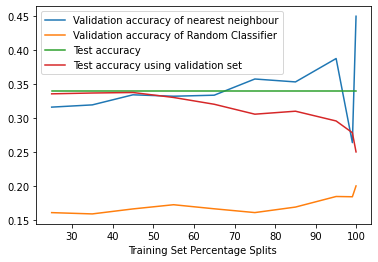

In [ ]:
plt.plot(train_splits, VA_NN, label='Validation accuracy of nearest neighbour')
plt.legend()
plt.plot(train_splits, VA_RC, label='Validation accuracy of Random Classifier')
plt.legend()
plt.plot(train_splits, TA, label= 'Test accuracy')
plt.legend()
plt.plot(train_splits, TA_usingval, label= 'Test accuracy using validation set')
plt.legend()
plt.xlabel('Training Set Percentage Splits ')

### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

As we increase the size of the validation dataset, we observe that the validation accuracy decreases. And as we reduce the size of the validation dataset, we observe that the validation accuracy increases. 

2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

As the training set increases (validation set decreases), then the test accuracy using validation set decreases. And as the training set decreases (validation set increases), then the test accuracy using validation set increases. 

3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

It will be a good to have 60-70% of the dataset for training, and 15-20% for validation, and 15-20% for testing. 

For extreme values (using 99.9% for training data and 0.1% for validation data), both the validation accuracy and the testing accuracy using validation data decrease significantly.



## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.343631036611673
test accuracy is  0.3395904436860068


In [ ]:
for i in train_splits:
  print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, i/100, 5, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3129911097482946
test accuracy is  0.3395904436860068
Average validation accuracy is  0.32066560099816116
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3267145659639825
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3353053102149637
test accuracy is  0.3395904436860068
Average validation accuracy is  0.33888373038353137
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34203278110729574
test accuracy is  0.3395904436860068
Average validation accuracy is  0.35401163571934297
test accuracy is  0.3395904436860068
Average validation accuracy is  0.33624445258149205
test accuracy is  0.3395904436860068
Average validation accuracy is  0.35065951916829113
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3145406383897432
test accuracy is  0.3395904436860068


In [ ]:
for i in train_splits:
  print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, i/100, 7, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.31166332323380436
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3235244787111881
test accuracy is  0.3395904436860068
Average validation accuracy is  0.33012159293806626
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3367132198240883
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34011943098653924
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34234903065508865
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3604629169216282
test accuracy is  0.3395904436860068
Average validation accuracy is  0.35144815108221467
test accuracy is  0.3395904436860068
Average validation accuracy is  0.357663206474305
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3676201249730661
test accuracy is  0.3395904436860068


In [ ]:
for i in train_splits:
  print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, i/100, 10, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.31302158149354536
test accuracy is  0.3395904436860068
Average validation accuracy is  0.32244178411684543
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3271694997838915
test accuracy is  0.3395904436860068
Average validation accuracy is  0.33529520563378157
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3370818861164614
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34465445786650634
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3448934414395017
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3466020553857131
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3340462262817786
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3894495020230314
test accuracy is  0.3395904436860068


In [ ]:
for i in train_splits:
  print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, i/100, 15, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3137426358514494
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3234656814877593
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3280590419932014
test accuracy is  0.3395904436860068
Average validation accuracy is  0.33621897153272806
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34061023387082184
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3446529593559831
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34647533535960395
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34637086865616146
test accuracy is  0.3395904436860068
Average validation accuracy is  0.36414298627216196
test accuracy is  0.3395904436860068
Average validation accuracy is  0.38770923047777267
test accuracy is  0.3395904436860068


In [ ]:
for i in train_splits:
  print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, i/100, 20, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.31359213471811165
test accuracy is  0.3395904436860068
Average validation accuracy is  0.321777626415804
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3311918879154286
test accuracy is  0.3395904436860068
Average validation accuracy is  0.33486783206340465
test accuracy is  0.3395904436860068
Average validation accuracy is  0.34000967367127344
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3456785878158415
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3498150599157103
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3562521282565344
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3586666290054924
test accuracy is  0.3395904436860068
Average validation accuracy is  0.3441275263027854
test accuracy is  0.3395904436860068


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?

Yes, Averaging the validation accuracy gives more consistent results

2. Does it give more accurate estimate of test accuracy?

Test accuracy is stable when the test data is kept constant, and the train-validation datasets are run across multiple splits. However test accuracy is more accurate as you increase the size of the train-validation dataset, and that allows for better training, and gives more accurate estimate of test accuracy. 

3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

Number of iterations doesn't have significant impact on the accuracy rates especially as we iterate beyond 10 times. We don't necessarily get better estimates with higher iterations. 

4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

The answer is No. Just increasing the Number of iterations on a small train dataset is not helpful. We need a larger train dataset.
